# Electric field normalization

In [1]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_COMPLEX_FIELDS_PREFIX, \
                          VALIDATION_COMPLEX_FIELDS_PATH, \
                          TEST_COMPLEX_FIELDS_PATH, \
                          FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX, \
                          FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH, \
                          FC_PROCESSED_TEST_COMaPLEX_FIELDS_FILE_PATH, \
                          FC_CROPPED_TRAIN_COMPLEX_FIELDS_PREFIX, \
                          FC_CROPPED_VALIDATION_COMPLEX_FIELDS_FILE_PATH, \
                          FC_CROPPED_TEST_COMPLEX_FIELDS_FILE_PATH, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT

from data_utils import normalize_data, \
                       save_numpy_array

from plot_utils import plot_amplitude_phase_intensity
import numpy as np

#from plot_utils import plot_amplitude_phase_intensity_from_complex_field

In [9]:
def process_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)
    processed_complex_field_arrays = processed_complex_field_arrays.reshape(SUBFILE_SAMPLES, 128*128*2)    
    return processed_complex_field_arrays

In [10]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_complex_field_arrays = process_fc_complex_field(filepath)

    save_numpy_array(processed_complex_field_arrays,
                    f"{FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}")


In [ ]:
processed_complex_field_arrays = process_fc_complex_field(VALIDATION_COMPLEX_FIELDS_PATH)

save_numpy_array(processed_complex_field_arrays,
                 FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)

In [12]:
processed_complex_field_arrays = process_fc_complex_field(TEST_COMPLEX_FIELDS_PATH)

save_numpy_array(processed_complex_field_arrays,
                 FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH)

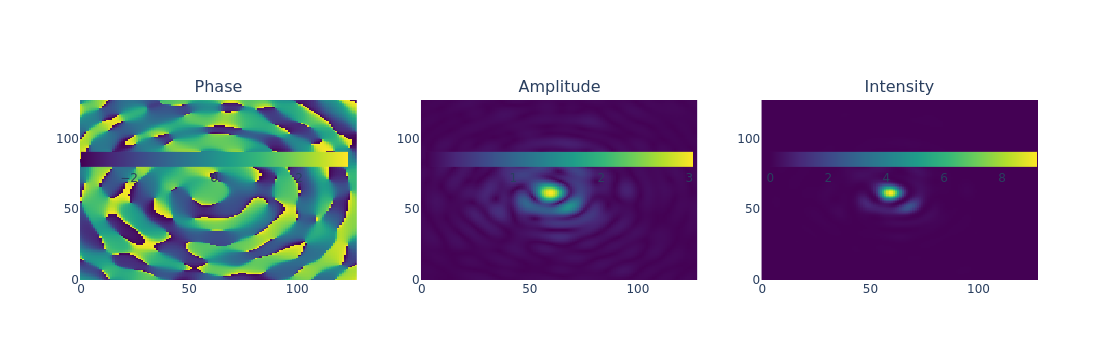

In [2]:
cfs = np.load(f"{FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX}00{NUMPY_SUFFIX}")
cf = cfs[2].reshape(2, 128, 128)
cf = cf[0] + 1j*cf[1]
plot_amplitude_phase_intensity(cf)

# Cropped electric fields

In [4]:
def crop_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)

    start_row = (128 - 64) // 2
    end_row = start_row + 64
    start_col = (128 - 64) // 2
    end_col = start_col + 64

    # Extract the central portion of the array
    cropped_complex_field_array = processed_complex_field_arrays[:, :, start_row:end_row, start_col:end_col]
    cropped_complex_field_array = cropped_complex_field_array.reshape(SUBFILE_SAMPLES, 64*64*2)    
    return cropped_complex_field_array

In [5]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}"
    cropped_complex_field_arrays = crop_fc_complex_field(filepath)
    
    save_numpy_array(cropped_complex_field_arrays,
                    f"{FC_CROPPED_TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}")

In [6]:
cropped_complex_field_arrays = crop_fc_complex_field(VALIDATION_COMPLEX_FIELDS_PATH)

save_numpy_array(cropped_complex_field_arrays,
                 FC_CROPPED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)

In [7]:
processed_complex_field_arrays = crop_fc_complex_field(TEST_COMPLEX_FIELDS_PATH)

save_numpy_array(cropped_complex_field_arrays,
                 FC_CROPPED_TEST_COMPLEX_FIELDS_FILE_PATH)

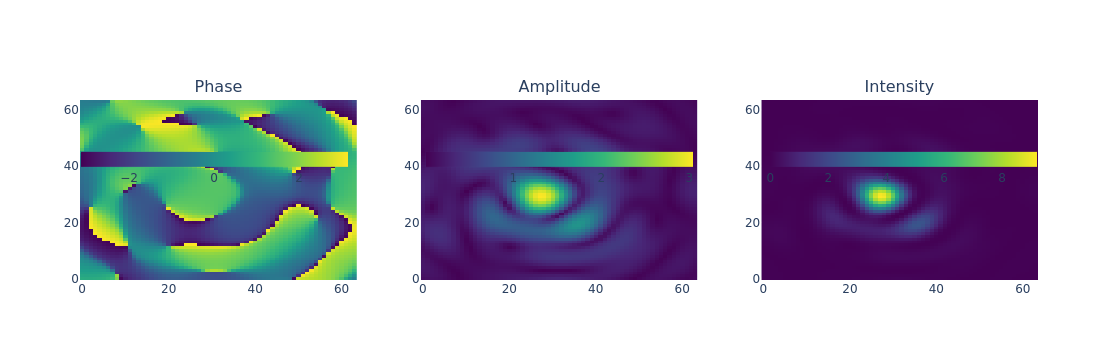

In [4]:
cfs = np.load(f"{FC_CROPPED_TRAIN_COMPLEX_FIELDS_PREFIX}00{NUMPY_SUFFIX}")
cf = cfs[2].reshape(2, 64, 64)
cf = cf[0] + 1j*cf[1]
plot_amplitude_phase_intensity(cf)

# Low order zernike electric fields

In [1]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT, \
                          TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          PROCESSED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PROCESSED_VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PROCESSED_VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PROCESSED_VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PROCESSED_VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PROCESSED_VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PROCESSED_TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH

from data_utils import normalize_data, \
                       save_numpy_array

from plot_utils import plot_amplitude_phase_intensity
import numpy as np

#from plot_utils import plot_amplitude_phase_intensity_from_complex_field

In [2]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PROCESSED_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            [2, 3]],
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           PROCESSED_VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           [2, 3]],
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PROCESSED_TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3]],
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PROCESSED_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           PROCESSED_VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           [2, 3, 4, 5, 6]],
    "TS5": [TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PROCESSED_TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3, 4, 5, 6]],
    "TR9": [TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PROCESSED_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    "V9": [VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           PROCESSED_VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    "TS9": [TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PROCESSED_TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    "TR14": [TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             PROCESSED_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "V14": [VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PROCESSED_VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "TS14": [TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             PROCESSED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
             PROCESSED_TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "TR20": [TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
             TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             PROCESSED_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
    "V20": [VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PROCESSED_VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
    "TS20": [TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             PROCESSED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
             PROCESSED_TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
}

In [3]:
def process_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)
    processed_complex_field_arrays = processed_complex_field_arrays.reshape(SUBFILE_SAMPLES, 128*128*2)    
    return processed_complex_field_arrays

def process_output_fluxes(filepath):
    output_fluxes = np.load(filepath)
    norm_fluxes, scaler = normalize_data(output_fluxes)
    
    return norm_fluxes
    #return output_fluxes

In [4]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Processing {dataset_name}")
    psf_path = ds_info[0]
    processed_psf_path = ds_info[1]
    flux_path = ds_info[2]
    processed_flux_path = ds_info[3]
    zernike_modes = len(ds_info[4])
    print(psf_path)
    print(processed_psf_path)
    print(flux_path)
    print(processed_flux_path)
    
    print()
    if dataset_name.startswith("TR"):
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            
            print("Processing PSFs")
            print(f"Train Subfile {fnumber}")
            
            filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            processed_complex_field_arrays = process_fc_complex_field(filepath)
            
            processed_filepath = f"{processed_psf_path}{fnumber}{NUMPY_SUFFIX}"
            save_numpy_array(processed_complex_field_arrays,
                             processed_filepath)
            
            print("Processing Fluxes")
            filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            processed_output_fluxes_arrays = process_output_fluxes(filepath)
            processed_filepath = f"{processed_flux_path}{fnumber}{NUMPY_SUFFIX}"
            save_numpy_array(processed_output_fluxes_arrays,
                             processed_filepath)
            
    else:
        print("Processing PSFs")
        processed_complex_field_arrays = process_fc_complex_field(psf_path)
        save_numpy_array(processed_complex_field_arrays,
                         processed_psf_path)
        print("Processing Fluxes")
        processed_output_fluxes_arrays = process_output_fluxes(flux_path)

        save_numpy_array(processed_output_fluxes_arrays,
                         processed_flux_path)

Processing TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/TrainData/fc_2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeOutputFluxes/TrainData/2M_processed_zernike_output_fluxes

Processing PSFs
Train Subfile 00
Processing Fluxes
Processing PSFs
Train Subfile 01
Processing Fluxes
Processing PSFs
Train Subfile 02
Processing Fluxes
Processing PSFs
Train Subfile 03
Processing Fluxes
Processing PSFs
Train Subfile 04
Processing Fluxes
Processing PSFs
Train Subfile 05
Processing Fluxes
Processing PSFs
Train Subfile 06
Processing Fluxes
Processing V2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/D

# Low Order Zernike Complex Field intensities

In [2]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT, \
                          TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          PROCESSED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          PROCESSED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          PROCESSED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          PROCESSED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          PROCESSED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          PROCESSED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          CROPPED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          CROPPED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          CROPPED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          CROPPED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX, \
                          CROPPED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CROPPED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH

from data_utils import normalize_data, \
                       save_numpy_array

from plot_utils import plot_amplitude_phase_intensity
import numpy as np

#from plot_utils import plot_amplitude_phase_intensity_from_complex_field

In [3]:
def process_fc_complex_field_intensity(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    intensities_arrays = np.abs(complex_arrays)**2

    start_row = (128 - 64) // 2
    end_row = start_row + 64
    start_col = (128 - 64) // 2
    end_col = start_col + 64

    cropped_intensities_array = intensities_arrays[:, start_row:end_row, start_col:end_col]

    intensities_arrays = intensities_arrays.reshape(SUBFILE_SAMPLES, 128*128)    
    cropped_intensities_array = cropped_intensities_array.reshape(SUBFILE_SAMPLES, 64*64)    
    
    return intensities_arrays, cropped_intensities_array

In [4]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX,
            CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX],
    
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
           CROPPED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
            CROPPED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX,
            CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX],
    
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
           CROPPED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TS5": [TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
            CROPPED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TR9": [TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX,
            CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX],
    
    "V9": [VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
           CROPPED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TS9": [TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
            CROPPED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TR14": [TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX,
            CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX],
    
    "V14": [VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
           CROPPED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TS14": [TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
            CROPPED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TR20": [TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            PROCESSED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX,
            CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PREFIX],
    
    "V20": [VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PROCESSED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
           CROPPED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
    "TS20": [TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PROCESSED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH,
            CROPPED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH],
    
}

In [5]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Processing {dataset_name}")
    psf_path = ds_info[0]
    processed_psf_intensity_path = ds_info[1]
    cropped_psf_intensity_path =  ds_info[2]
    
    print(psf_path)
    print(processed_psf_intensity_path)
    print(cropped_psf_intensity_path)
    
    print()
    if dataset_name.startswith("TR"):
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            
            print("Processing PSFs")
            print(f"Train Subfile {fnumber}")
            
            filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            processed_psf_intensities_arrays, cropped_psf_intensities_arrays = process_fc_complex_field_intensity(filepath)
            
            processed_intensities_filepath = f"{processed_psf_intensity_path}{fnumber}{NUMPY_SUFFIX}"
            save_numpy_array(processed_psf_intensities_arrays,
                             processed_intensities_filepath)

            cropped_intensities_filepath = f"{cropped_psf_intensity_path}{fnumber}{NUMPY_SUFFIX}"
            save_numpy_array(cropped_psf_intensities_arrays,
                             cropped_intensities_filepath)
            
    else:
        print("Processing PSFs")
        processed_psf_intensities_arrays, cropped_psf_intensities_arrays = process_fc_complex_field_intensity(psf_path)
        
        save_numpy_array(processed_psf_intensities_arrays,
                         processed_psf_intensity_path)
        
        save_numpy_array(cropped_psf_intensities_arrays,
                         cropped_psf_intensity_path)

Processing TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/TrainData/fc_intensity_2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/TrainData/fc_intensity_cropped_2M_zernike_complex_fields

Processing PSFs
Train Subfile 00
ERROR: /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/TrainData/fc_intensity_2M_zernike_complex_fields00.npy already exists.
Processing PSFs
Train Subfile 01
ERROR: /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/TrainData/fc_intensity_2M_zernike_complex_fields01.npy already exists.
Processing PSFs
Train Subfile 02
Processing PSFs
Train Subfile 03
Processing PSFs
Train Subfile 04


In [15]:
a = process_fc_complex_field_intensity(VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

In [16]:
a.shape

(10000, 16384)

# Cropped Low Order Zernike Complex Fields

In [6]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT, \
                          TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          CROPPED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CROPPED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH

import numpy as np

from data_utils import normalize_data, \
                       save_numpy_array


In [7]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            CROPPED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX],
    
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           CROPPED_VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,],
    
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            CROPPED_TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            CROPPED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX],
    
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           CROPPED_VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TS5": [TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            CROPPED_TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TR9": [TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            CROPPED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX],
    
    "V9": [VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           CROPPED_VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TS9": [TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            CROPPED_TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TR14": [TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
             CROPPED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX],
    
    "V14": [VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            CROPPED_VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TS14": [TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             CROPPED_TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TR20": [TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
             CROPPED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX],
    
    "V20": [VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            CROPPED_VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
    
    "TS20": [TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             CROPPED_TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH],
}

In [8]:
def crop_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)

    start_row = (128 - 64) // 2
    end_row = start_row + 64
    start_col = (128 - 64) // 2
    end_col = start_col + 64

    # Extract the central portion of the array
    cropped_complex_field_array = processed_complex_field_arrays[:, :, start_row:end_row, start_col:end_col]
    cropped_complex_field_array = cropped_complex_field_array.reshape(SUBFILE_SAMPLES, 64*64*2)    
    return cropped_complex_field_array

In [ ]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Processing {dataset_name}")
    psf_path = ds_info[0]
    cropped_psf_path = ds_info[1]

    print()
    print(psf_path)
    print(cropped_psf_path)
    if dataset_name.startswith("TR"):
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print(f"Train Subfile {fnumber}")
            filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            cropped_complex_field_arrays = crop_fc_complex_field(filepath)
            cropped_file_path = f"{cropped_psf_path}{fnumber}{NUMPY_SUFFIX}"
            save_numpy_array(cropped_complex_field_arrays,
                             cropped_file_path)
    else:
        cropped_complex_field_arrays = crop_fc_complex_field(psf_path)

        save_numpy_array(cropped_complex_field_arrays,
                         cropped_psf_path)

Processing TR2

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/TrainData/fc_cropped_2M_zernike_complex_fields
Train Subfile 00
Train Subfile 01
Train Subfile 02
Train Subfile 03
Train Subfile 04
Train Subfile 05
Train Subfile 06
Processing V2

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/ValidationData/2M_zernike_complex_fields07.npy
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFields/ValidationData/fc_cropped_2M_zernike_complex_fields07.npy
Processing TS2

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TestData/2M_zernike_complex_fields08.npy
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedZernikeComplexFie

# Output fluxes normalization

In [1]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX, \
                          FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH, \
                          SUBFILE_SAMPLES

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

In [2]:
def process_output_fluxes(filepath):
    output_fluxes = np.load(filepath)
    norm_fluxes, scaler = normalize_data(output_fluxes)
    
    return norm_fluxes
    #return output_fluxes

In [3]:
print(PSF_TRAIN_FILE_SUFFIXES[2])

02


In [4]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_OUTPUT_FLUXES_FILE_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_output_fluxes_arrays = process_output_fluxes(filepath)

    save_numpy_array(processed_output_fluxes_arrays,
                    f"{FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX}{train_file}{NUMPY_SUFFIX}")

00
01
02
03
04
05
06


In [5]:
processed_output_fluxes_arrays = process_output_fluxes(VALIDATION_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH)

In [6]:
processed_output_fluxes_arrays = process_output_fluxes(TEST_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH)